# American sign language alphabets recognition using multi-layer perceptron network.

In [26]:
# Importing the libraries.

import tensorflow as tf
import cv2
from glob import glob
from matplotlib import pyplot as plt
import random
import math
import os
import numpy as np
from numpy.random import seed
seed(100)
from tensorflow import set_random_seed
set_random_seed(101)


In [49]:
# A utility function to display sample images from the dataset.


def plotSample(character):
    print("Samples images for letter " + character)
    basePath = '../input/asl_alphabet_train/asl_alphabet_train/'
    imagePath = basePath + character + '/**'
    pathData = glob(imagePath)
    
    plt.figure(figsize=(16,16))
    images = random.sample(pathData, 3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(images[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(images[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(images[2]))
    plt.colorbar()
    plt.show()
    return

Samples images for letter H


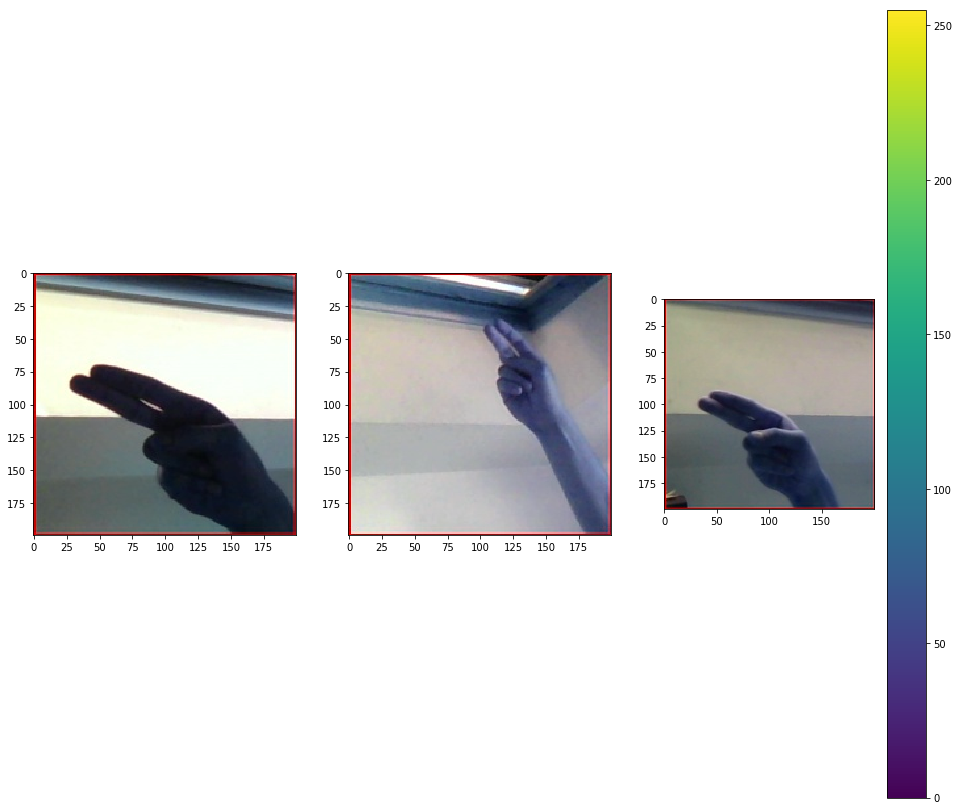

In [11]:
plotSample('H')

### Importing the data using ImageDataGenerator module from Tensorflow.

In [12]:
dataPath = "../input/asl_alphabet_train/asl_alphabet_train"
resizeTuple = (64, 64)
resizeDim = (64, 64, 3)
numLabels = 29
batchSize = 64

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=0.1)

train_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, shuffle=True, subset="training")
val_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [13]:
# A utility function to plot the loss and accuracy learning curves.

def plotCurves(history):
    # Plotting history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training accuracy', 'validation accuracy'], loc='upper right')
    plt.show()


    # Plotting history for losses
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training loss', 'validation loss'], loc='upper right')
    plt.show()

### Defining a basic neural network model. This will be a shallow network. The numpy array representing a image will be unpacked and flattened to form a vector. This will be done for all images. The first two hidden layers contains 15 neurons with ReLU activation and some level of L2 regularization with lambda = 0.002. The output layer will be a 29 neurons layer with softmax activation for multi-class classification.

Epoch 1/10
1224/1224 [==============================] - 138s 113ms/step - loss: 2.7545 - acc: 0.1832 - val_loss: 2.3162 - val_acc: 0.2514
Epoch 2/10
1224/1224 [==============================] - 135s 110ms/step - loss: 1.8636 - acc: 0.4063 - val_loss: 1.9048 - val_acc: 0.3587
Epoch 3/10
1224/1224 [==============================] - 136s 111ms/step - loss: 1.5630 - acc: 0.5091 - val_loss: 1.6299 - val_acc: 0.4884
Epoch 4/10
1224/1224 [==============================] - 136s 111ms/step - loss: 1.4551 - acc: 0.5517 - val_loss: 1.7658 - val_acc: 0.4403
Epoch 5/10
1224/1224 [==============================] - 134s 109ms/step - loss: 1.3994 - acc: 0.5705 - val_loss: 1.9319 - val_acc: 0.4382
Epoch 6/10
1224/1224 [==============================] - 135s 110ms/step - loss: 1.3528 - acc: 0.5880 - val_loss: 2.0570 - val_acc: 0.4200
Epoch 7/10
1224/1224 [==============================] - 135s 110ms/step - loss: 1.3214 - acc: 0.5978 - val_loss: 1.5294 - val_acc: 0.5616
Epoch 8/10
1224/1224 [============

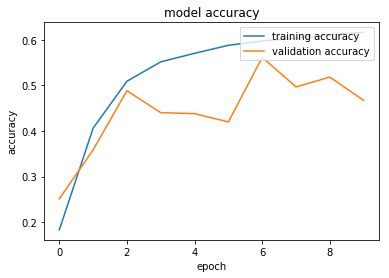

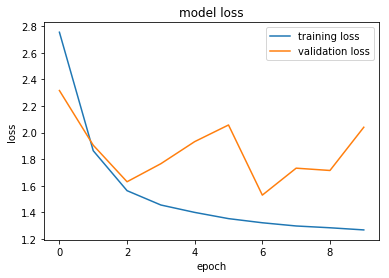

In [14]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=resizeDim),
    tf.keras.layers.Dense(15, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dense(15, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dense(29, activation = "softmax")
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

history = model_1.fit_generator(train_generator, epochs=10, steps_per_epoch = 1224,validation_data=val_generator, validation_steps = 136, verbose = 1)

plotCurves(history)

### Note: One can observe in the above learning curves that the loss minimization for validation dataset is not consistently decreasing which means that there is less learning happening over validation dataset (no generalization) even though the network is learning comparitively well on the training dataset. This is a clear sign of overfitting. We can avoid the huge gap between the loss curves over training and validation datasets by increasing regularization in our network.

### The below network includes a dropout layer with keep probability = 0.8 which means that each neuron in the layer has 20% chance of being dropped out. This will introduce some noise to our network thus increasing the regularization effect.

#### Note: We have removed the regularization from our second hidden layer and increased the lambda for L2 regularization in our first layer to 0.005 from 0.002 initially.

Epoch 1/10
1224/1224 [==============================] - 144s 117ms/step - loss: 3.2332 - acc: 0.0749 - val_loss: 3.1768 - val_acc: 0.0907
Epoch 2/10
1224/1224 [==============================] - 137s 112ms/step - loss: 2.9026 - acc: 0.1301 - val_loss: 2.7212 - val_acc: 0.1464
Epoch 3/10
1224/1224 [==============================] - 134s 110ms/step - loss: 2.7521 - acc: 0.1631 - val_loss: 2.6329 - val_acc: 0.1714
Epoch 4/10
1224/1224 [==============================] - 137s 112ms/step - loss: 2.7084 - acc: 0.1776 - val_loss: 2.5178 - val_acc: 0.2010
Epoch 5/10
1224/1224 [==============================] - 135s 110ms/step - loss: 2.6808 - acc: 0.1890 - val_loss: 2.5591 - val_acc: 0.1951
Epoch 6/10
1224/1224 [==============================] - 133s 109ms/step - loss: 2.6656 - acc: 0.1935 - val_loss: 2.4349 - val_acc: 0.2564
Epoch 7/10
1224/1224 [==============================] - 135s 110ms/step - loss: 2.6439 - acc: 0.2012 - val_loss: 2.4445 - val_acc: 0.2160
Epoch 8/10
1224/1224 [============

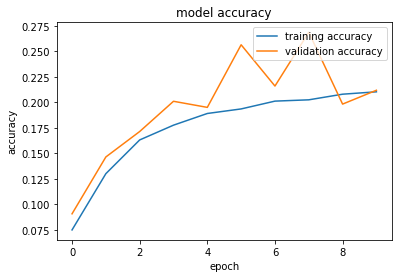

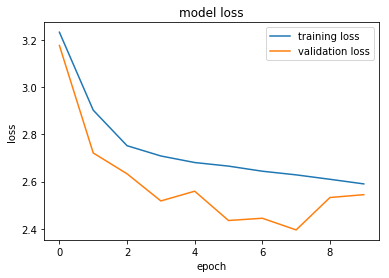

In [15]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=resizeDim),
    tf.keras.layers.Dense(15, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(29, activation = "softmax")
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

history = model_2.fit_generator(train_generator, epochs=10, steps_per_epoch = 1224,validation_data=val_generator, validation_steps = 136, verbose = 1)

plotCurves(history)

### Note: The above trained model shows comparitively better performance over validation dataset than training dataset. The loss learning curve for the validation dataset shows that the loss decreases overall throughout the training process but is still inconsistent. We can also notice that the accuracy over the training and validation dataset is extremely low. Therefore, let us now try a compartively more complex model with more layers and neurons per layer and little more regularization to compensate for the added complexity.

#### We also start with a lower learning rate (earlier: default learning_rate was used which is 0.01) in our next model and include a callback to learning_rate scheduler so that the learning_rate is reduced over time to avoid divergence when close to the loss minimum.

In [50]:
# A utility function to define a learning_rate decay based on epoch schedule.

def scheduler(epoch):
    if epoch < 5:
        return 0.00001
    else:
        return 0.00001 * math.exp(0.1 * (5 - epoch))

Epoch 1/10
1224/1224 [==============================] - 134s 110ms/step - loss: 6.8031 - acc: 0.1338 - val_loss: 6.2717 - val_acc: 0.2069
Epoch 2/10
1224/1224 [==============================] - 131s 107ms/step - loss: 5.8525 - acc: 0.2936 - val_loss: 5.5258 - val_acc: 0.2840
Epoch 3/10
1224/1224 [==============================] - 132s 108ms/step - loss: 5.1626 - acc: 0.4033 - val_loss: 5.0604 - val_acc: 0.3248
Epoch 4/10
1224/1224 [==============================] - 129s 106ms/step - loss: 4.6878 - acc: 0.4843 - val_loss: 4.7141 - val_acc: 0.3806
Epoch 5/10
1224/1224 [==============================] - 129s 106ms/step - loss: 4.3285 - acc: 0.5448 - val_loss: 4.4843 - val_acc: 0.4263
Epoch 6/10
1224/1224 [==============================] - 128s 104ms/step - loss: 4.0405 - acc: 0.5905 - val_loss: 4.2319 - val_acc: 0.4753
Epoch 7/10
1224/1224 [==============================] - 128s 104ms/step - loss: 3.7960 - acc: 0.6298 - val_loss: 4.0477 - val_acc: 0.4957
Epoch 8/10
1224/1224 [============

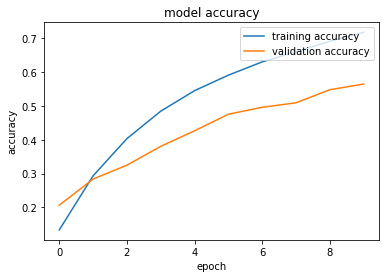

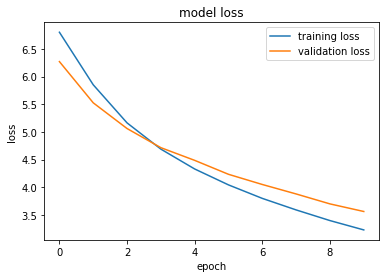

In [24]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=resizeDim),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(29, activation = "softmax")
])

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = model_3.fit_generator(train_generator, epochs=10, steps_per_epoch = 1224,validation_data=val_generator, validation_steps = 136, callbacks = [callback], verbose = 1)

plotCurves(history)

### Note: The above learning curves show that the network is learning in a better way now. The training accuracy goes well upto 70% and validation accuracy goes upto 56.5%. The training and validation loss curves are still decreasing at the end of the training phase. This indicates that there is more room for learning. Therefore, we can run the model for more epochs. We will also have to tweak our learning_rate scheduler callback according to the number of epochs set.

In [51]:
# A utility function to define a learning_rate decay based on epoch schedule.

def scheduler(epoch):
    if epoch < 25:
        return 0.00001
    else:
        return 0.00001 * math.exp(0.1 * (25 - epoch))

Epoch 1/30
1224/1224 [==============================] - 140s 114ms/step - loss: 6.7411 - acc: 0.1443 - val_loss: 6.2177 - val_acc: 0.2379
Epoch 2/30
1224/1224 [==============================] - 136s 111ms/step - loss: 5.7322 - acc: 0.3022 - val_loss: 5.5151 - val_acc: 0.2995
Epoch 3/30
1224/1224 [==============================] - 135s 110ms/step - loss: 5.0477 - acc: 0.4132 - val_loss: 5.0191 - val_acc: 0.3762
Epoch 4/30
1224/1224 [==============================] - 137s 112ms/step - loss: 4.5626 - acc: 0.4980 - val_loss: 4.6779 - val_acc: 0.4231
Epoch 5/30
1224/1224 [==============================] - 138s 112ms/step - loss: 4.1976 - acc: 0.5610 - val_loss: 4.3797 - val_acc: 0.4703
Epoch 6/30
1224/1224 [==============================] - 138s 113ms/step - loss: 3.9053 - acc: 0.6103 - val_loss: 4.1740 - val_acc: 0.4782
Epoch 7/30
1224/1224 [==============================] - 136s 111ms/step - loss: 3.6655 - acc: 0.6500 - val_loss: 3.9246 - val_acc: 0.5234
Epoch 8/30
1224/1224 [============

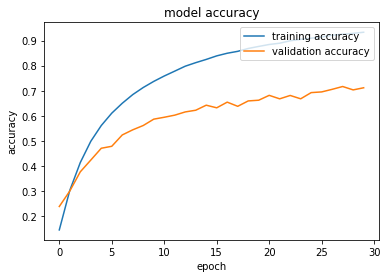

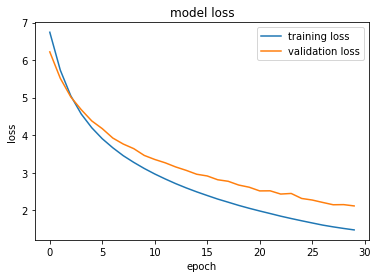

In [22]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=resizeDim),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(29, activation = "softmax")
])

model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = model_4.fit_generator(train_generator, epochs=30, steps_per_epoch = 1224,validation_data=val_generator, validation_steps = 136, callbacks = [callback], verbose = 1)


plotCurves(history)

### The above learning curves shows that we have a decent fit over our data.

#### Note: We did not monitor accuracies in our training process since a multi layer perceptron network is not considered to be very efficient over image data. Convolutional neural networks are considered to be more efficient since they also take into consideration, the pixels with their spatial structure and hence perform better than MLP networks.
